In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yekahaaagayeham/time-series-toy-data-set")

print("Path to dataset files:", path)

100%|██████████| 9.02k/9.02k [00:00<00:00, 4.22MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yekahaaagayeham/time-series-toy-data-set/versions/1


In [2]:
!ls /root/.cache/kagglehub/datasets/yekahaaagayeham/time-series-toy-data-set/versions/1

catfish.csv    ice_cream_interest.csv	original_series.csv
ice_cream.csv  ice_cream_vs_heater.csv	sales.csv


In [25]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [28]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')
#read data
catfish_sales = pd.read_csv(path+'/catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)

In [29]:
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [30]:
#transform
start_date = datetime(1996,1,1)
end_date = datetime(2008,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

Text(0, 0.5, 'Sales')

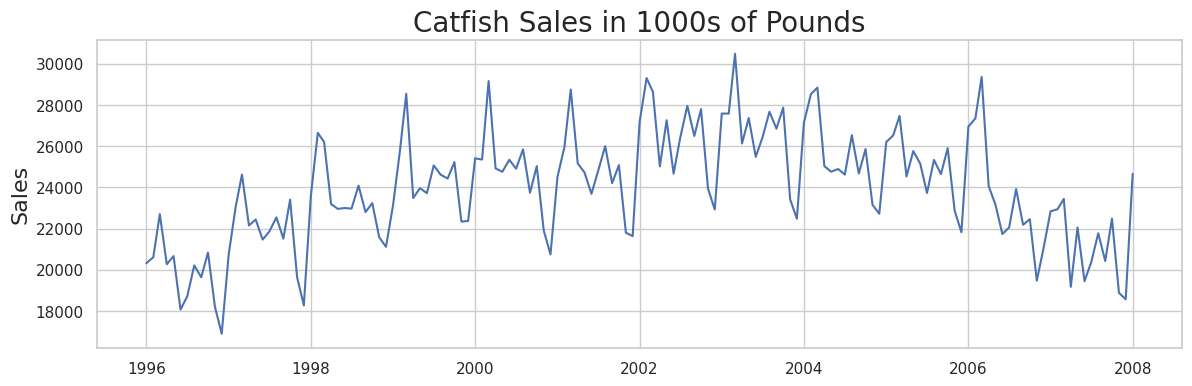

In [31]:
#plot
plt.figure(figsize=(14,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)

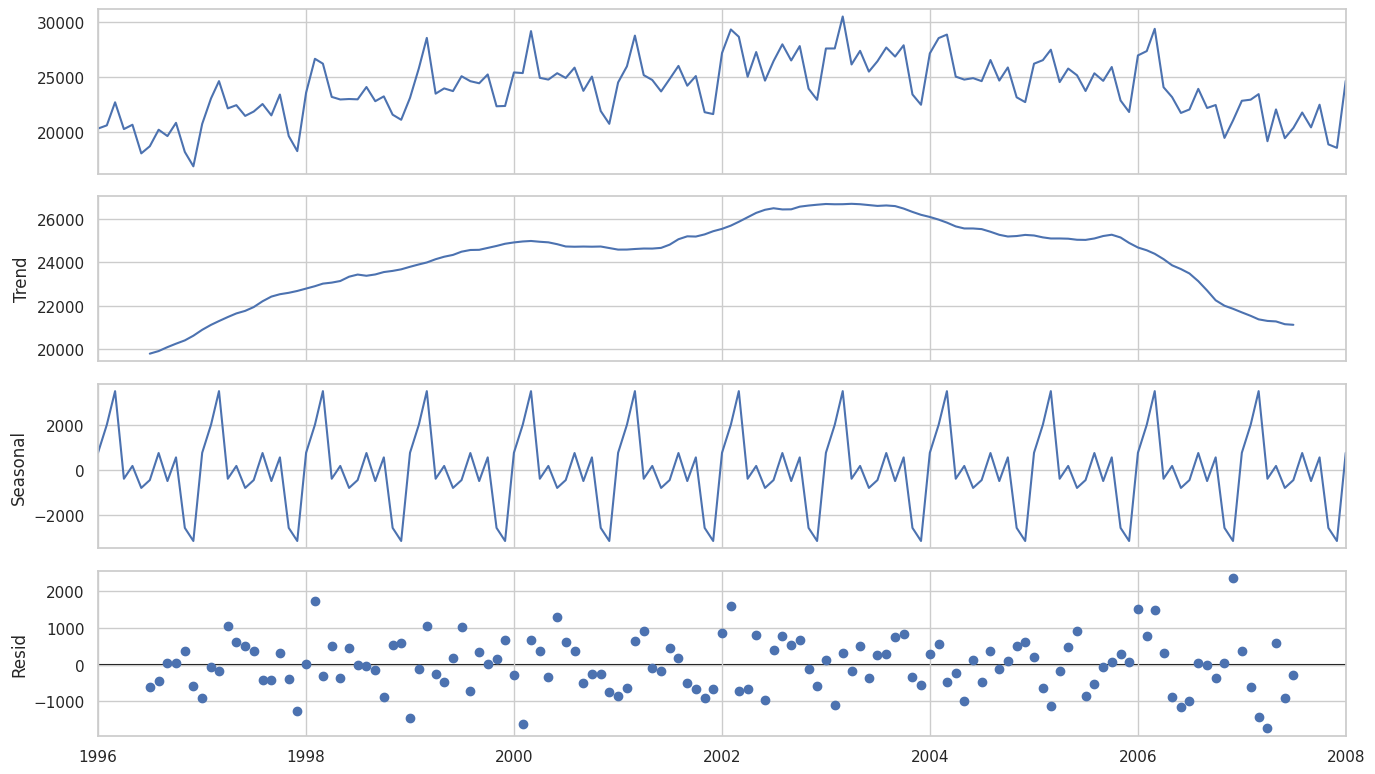

In [32]:
# STL decomposition

plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(lim_catfish_sales,model='additive')
fig = result.plot()

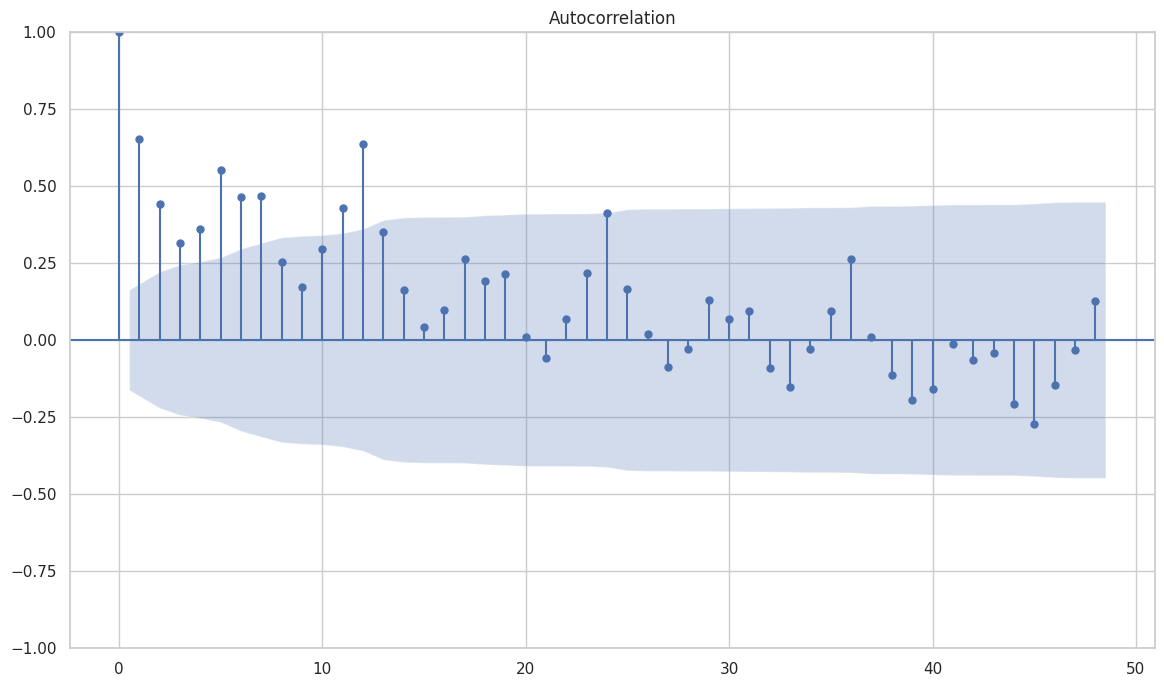

In [33]:
# ACF and PACF plots

plot_acf(lim_catfish_sales['Total'], lags=48);

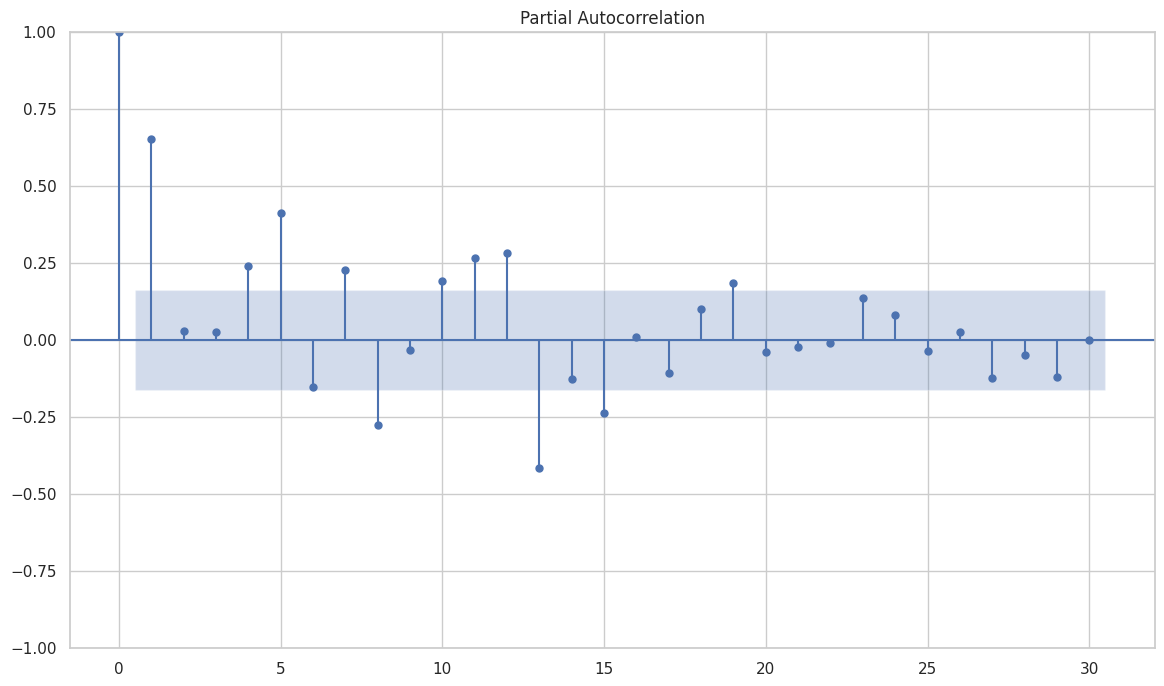

In [34]:
plot_pacf(lim_catfish_sales['Total'], lags=30);

In [35]:
# Fitting ARIMA

from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(lim_catfish_sales['Total'], order=(12,1,1))
predictions = arima.fit().predict()

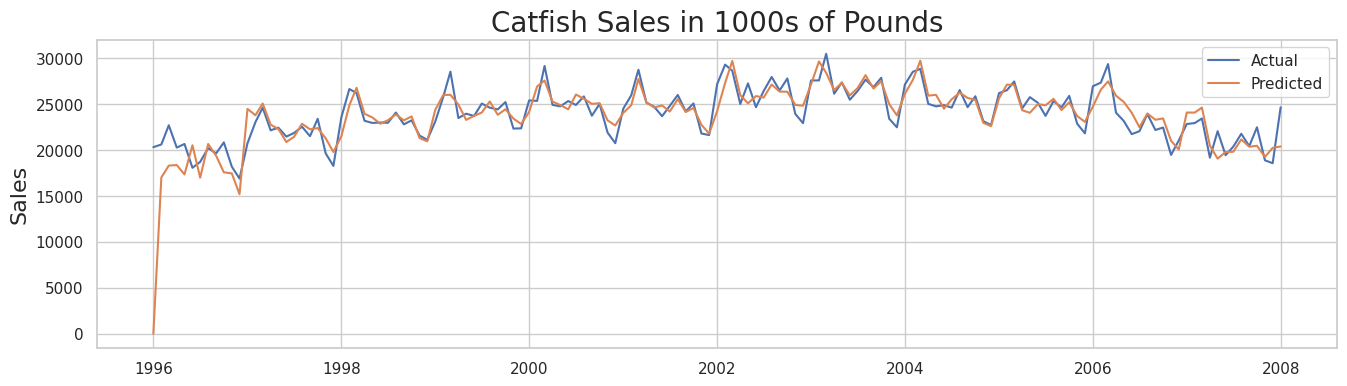

In [37]:
# Visualizing the result

plt.figure(figsize=(16,4))
plt.plot(lim_catfish_sales, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.legend()

# Implementing SARIMA

In [38]:
sarima = SARIMAX(lim_catfish_sales['Total'],
                order=(1,1,1),
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

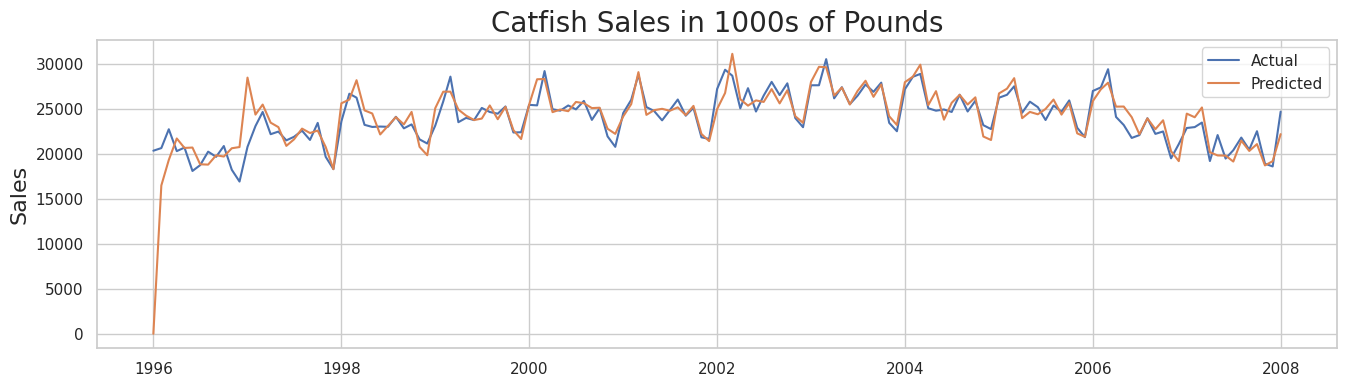

In [39]:
# Visualizing the result

plt.figure(figsize=(16,4))
plt.plot(lim_catfish_sales, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.legend()